# Lab 6 - Confidence Intervals

##### PHYS434 - Advanced Laboratory: Computational Data Analysis
##### Professor: Miguel Morales
<br>

##### Due date: 11/22/2021
##### By Erik Solhaug
<br>

In this lab, we will explore our data and apply confidence intervals.

From the previous lab, we have the data presented below.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pickle
import math

import pandas as pd

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

In [2]:
user_dir = '/home/jovyan/Phys434_Autumn2021/'
data_dir = user_dir + 'LHC_data/'
data_dir

'/home/jovyan/Phys434_Autumn2021/LHC_data/'

In [3]:
with open(f'{data_dir}/higgs_100000_pt_250_500.pkl', 'rb') as f:
    higgs = pickle.load(f)

In [4]:
with open(f'{data_dir}/qcd_100000_pt_250_500.pkl', 'rb') as f:
    qcd = pickle.load(f)

In [5]:
higgs

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,472.074292,0.137052,-2.535145,125.150365,0.126581,0.002633,1.298020,0.008218,0.739787,0.283689,0.174944,0.383474,0.616674,0.557407
1,470.405678,-0.039157,0.069669,130.552672,0.118071,0.002379,1.445626,0.013822,0.747927,0.234281,0.193354,0.313240,0.825308,0.704650
2,438.008357,-0.181139,-3.031083,125.703063,0.167344,0.004623,0.986597,0.004545,1.001379,0.440523,0.218649,0.439917,0.496338,0.487496
3,484.860421,0.251986,2.855706,126.215853,0.119238,0.002066,1.218467,0.006740,0.761892,0.228160,0.193810,0.299465,0.849449,0.594872
4,486.141137,-1.917812,-2.221953,132.182504,0.103632,0.001438,1.291784,0.000398,0.722656,0.166851,0.148080,0.230886,0.887497,0.678118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,478.658254,-0.837586,-2.609921,125.707302,0.138041,0.001494,0.567994,0.000953,1.192189,0.131294,0.109689,0.110129,0.835446,0.504678
99996,465.171259,0.429341,-1.446681,129.749906,0.135890,0.002071,0.825176,0.005110,0.751448,0.140336,0.115123,0.186755,0.820334,0.586032
99997,466.920808,-0.805493,-0.754703,49.069161,0.020281,0.000121,14.506839,0.004768,0.864723,0.568722,0.395942,0.657693,0.696196,0.018073
99998,471.611853,0.801813,-3.077883,117.186361,0.102276,0.002399,2.242231,0.006947,0.759346,0.318427,0.274153,0.419343,0.860960,0.641892


In [6]:
qcd

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,489.631389,1.955969,1.803007,125.298720,0.099409,0.003247,3.304886,0.000528,0.846096,0.586658,0.439468,0.693370,0.749105,0.333731
1,401.041884,-1.170413,0.188817,88.047054,0.101181,0.002527,2.439089,0.001561,0.852379,0.517657,0.336052,0.607308,0.649178,0.477481
2,447.487556,1.861736,-2.326646,85.794174,0.069372,0.001375,4.118371,0.000197,0.979133,0.815123,0.700152,0.832495,0.858953,0.117091
3,402.652836,1.276421,-1.124176,42.947328,0.032095,0.000266,8.038338,0.001144,1.020193,0.664347,0.617499,0.651197,0.929482,0.054606
4,484.257672,-1.272225,1.966794,59.542227,0.038348,0.000358,6.353842,0.001619,0.875408,0.436270,0.376816,0.498362,0.863723,0.095201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,418.171225,1.804938,-1.555512,67.399102,0.047555,0.000669,6.216951,0.000335,0.794253,0.734325,0.533141,0.924548,0.726028,0.039376
99996,492.119236,-0.037258,0.037888,90.775772,0.095329,0.001090,1.258409,0.005327,0.849051,0.285315,0.177652,0.336041,0.622651,0.321335
99997,492.932552,-0.912632,0.578690,106.611253,0.078793,0.002331,4.764786,0.004449,0.951293,0.789768,0.620329,0.830205,0.785457,0.053165
99998,402.673975,-1.736921,-2.103913,66.278542,0.066585,0.000851,2.881152,0.000324,0.831466,0.488685,0.429960,0.587739,0.879831,0.212806


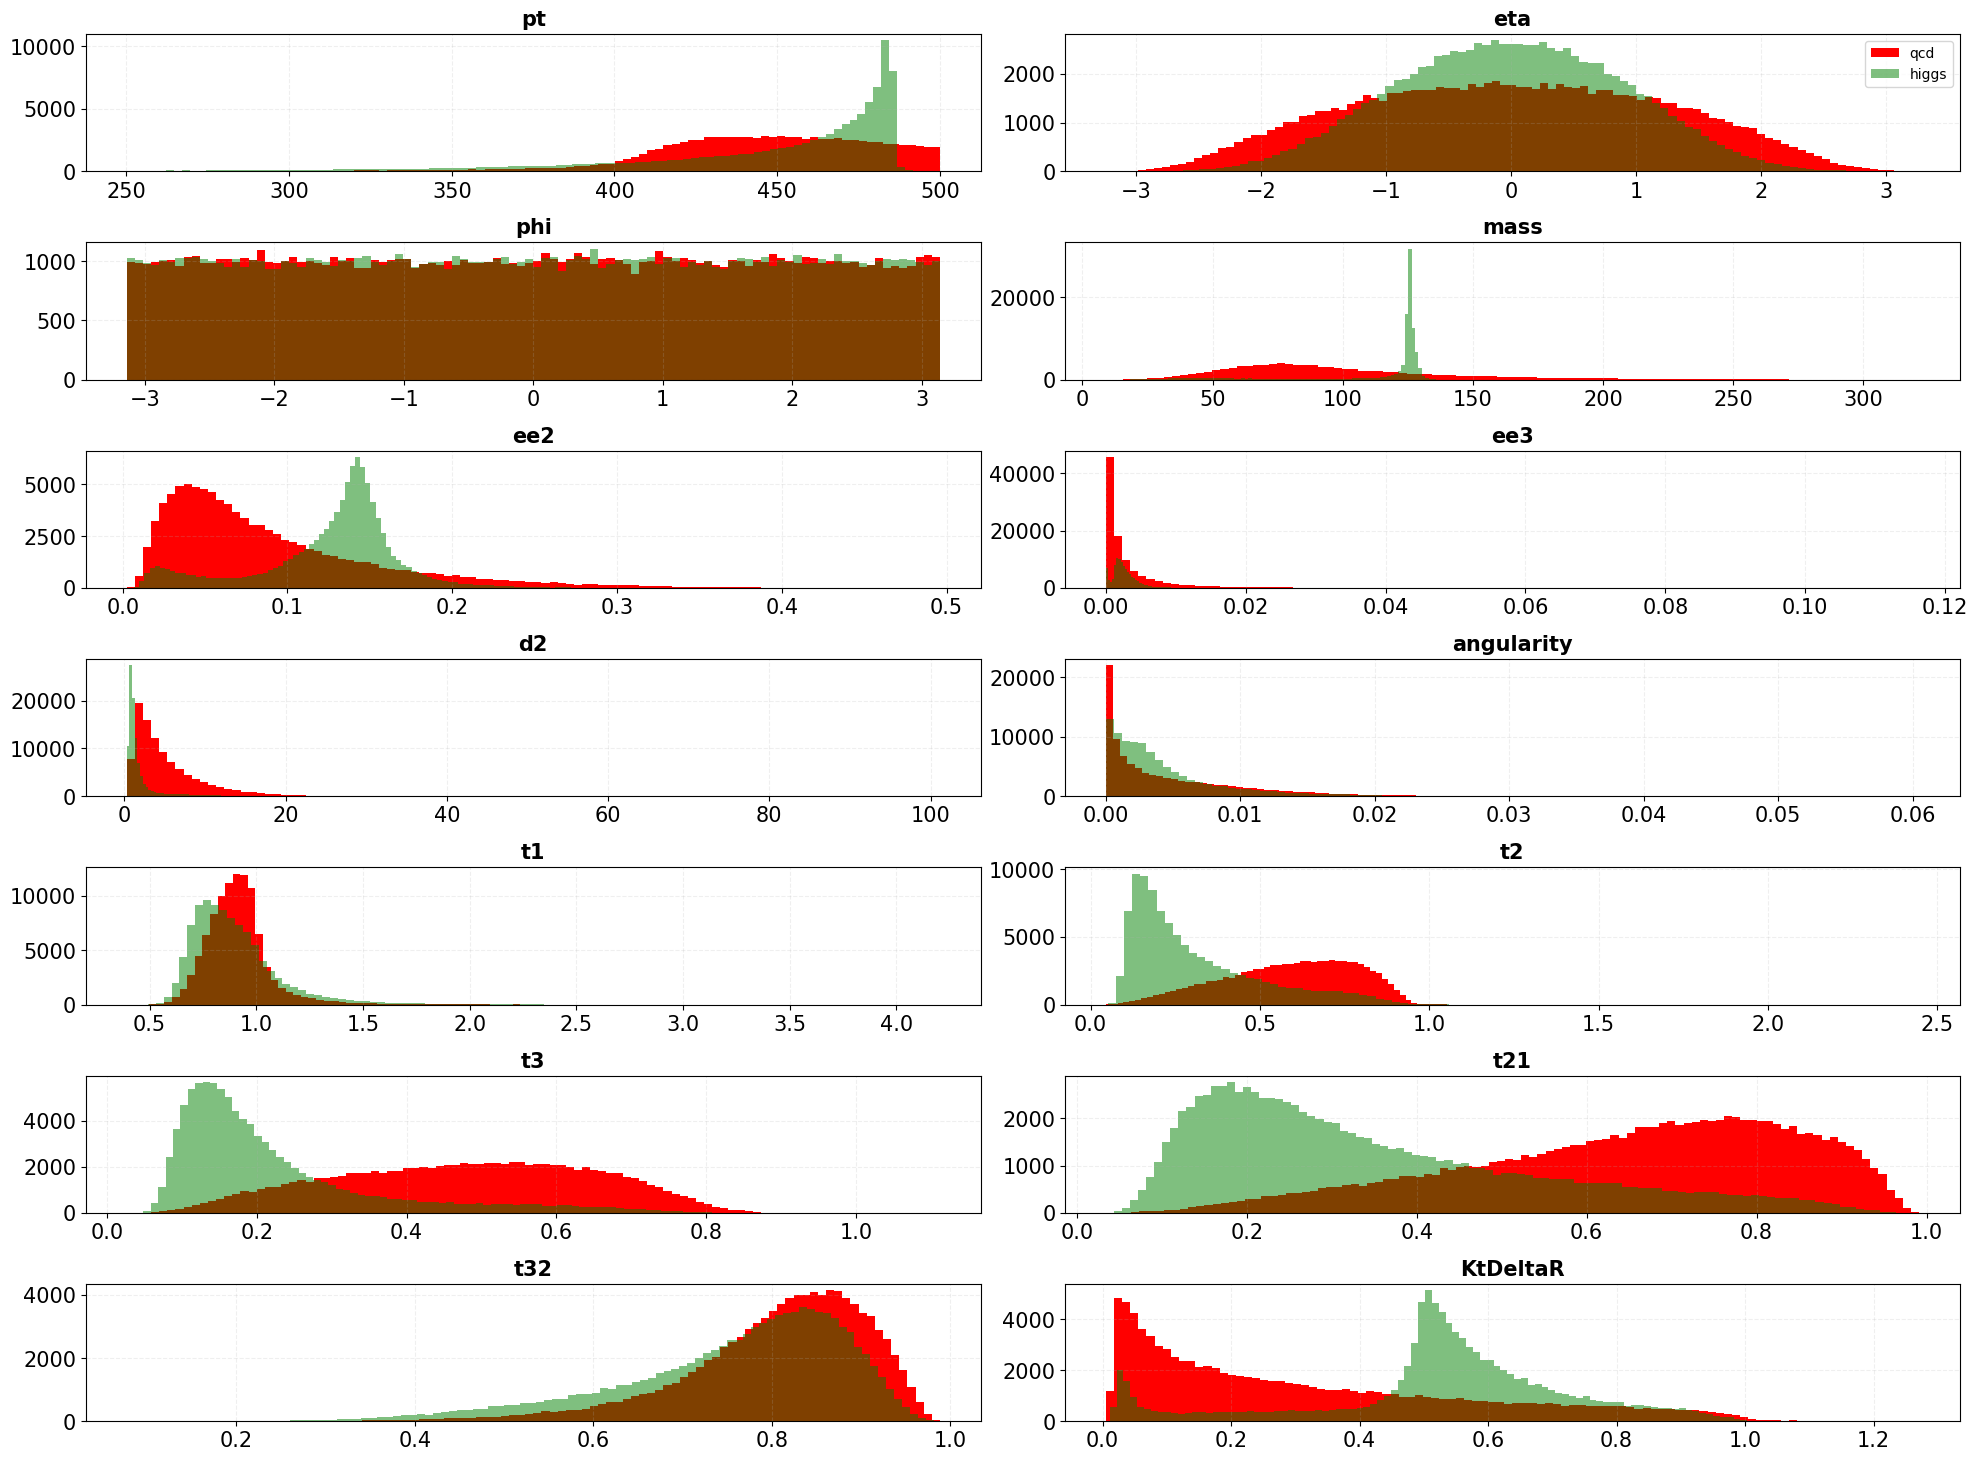

In [7]:
fig, ax = plt.subplots(7, 2)
fig.tight_layout(pad=3.0)

for i in range(0,qcd.columns.size):
    name = qcd.columns[i]
    X1 = qcd[f'{name}']
    X2 = higgs[f'{name}']
    
    bins = 100
    
    row = math.floor(i/2)
    col = i%2
    
    ax[row, col].tick_params(labelsize = 15)
    ax[row, col].tick_params(labelsize = 15)
    ax[row, col].hist(X1, bins, color='r', linewidth = 3, label = 'qcd')
    ax[row, col].hist(X2, bins, color='g', alpha = 0.5, linewidth = 3, label='higgs')
    ax[row, col].set_title(f'{name}', fontsize = 15, fontweight='bold')
    ax[row, col].grid(linestyle='--', alpha=0.2)
ax[0, 1].legend();

- **pt** - We have already described **$p_T$** above, but as a reminder, this is the transverse momentum - the momentum perpendicular to the colliding particle beams - of the jet.

- **phi** - the azimuthal angle about the axis of the colliding beams at which the detector detects the outcoming jets. The angle is seemingly random and is fairly evenly distributed across the values $-\pi<\phi<\pi$. Adding up all the collision counts across this space should yield the number of jets which is 100,000 as previously stated (this should be true for all other frames plotted above).

- **'eta'** - is described as the _pseudorapidity_ which is related to and depends on _theta_ - the angle of the jet relative to the colliding beams. Thus, since the space in _eta_ spans from negative infinity to infinity it makes sense that the distribution is a Gaussian centered on zero, as this will be the most probably value of _eta_. An _eta_ of 0 corresponds to a jet with a completely perpendicular angle from the colliding beams (90 degrees) while an _eta_ of specifically 1 and -1 corresponds to an angle of 40 and 130 degrees relative to the beam. Hence, _eta_ of $\infty$ and $-\infty$ corresponds to jets parallel and antiparallel respectively to the beam. Hence, $-\infty < \eta < \infty$ corresponds to $-\pi < \theta < \pi$.

- **angularity** - a family of infrared-safe quantities that have characteristic distributions for two-body decays

 - **mass** - given in GeV and the most probable Higgs mass is stated as 125 GeV. This will of course have some uncertainty which is reflected in the Higgs dataset's mass data. The mass of the quantum chromodynamics (QCD) background particles are more spread out as the biproducts of pp-collisions can result in a variety of particles with different masses. The mass is reconstructed from the muon-corrected combined mass of the jet.

- **ee2 and ee3** - correspond to the energy correlation functions (the i-th energy correlation function; $i=2,3$) which are based on the energies and pair-wise angles of particles within a jet

- **d2** - is a function of the energy correlation functions $ECF_3 ·(\frac{ECF_1}{ECF_2})^3$. Thus, _d2_ is related to the parameters _ee2_ and _ee3_.

- **t1**, **t2**, **t3**, **t21** and **t32** - these are the $\tau$-parameters which gives the n-subjettiness of the jet. N-subjettiness sums the angular distances of jet constituents to their nearest subjet axis

- **KtDeltaR** - $\Delta R$ of two subjets within the large-$R$ jet. This corresponds to the minimal relative transverse momentum between particles.

For more information on the jet parameters, see p. 17 in this paper https://arxiv.org/pdf/1906.11005v2.pdf.

## Problem 1

Now, we are going to fake a background for our experiment to explore how we can use confidence intervals in our data. The physical characteristics of the experiment calls for a Poisson distribution, so we will let the background be a Poisson distribution with an arbitrary **mean of 100**.

In [8]:
background = stats.poisson(mu=100)

In [9]:
prob_5sigma = 1/3.5e6
y = background.ppf(1 - prob_5sigma)
y

154.0

In [10]:
print(f'The signal would need to be of at least strength {y:.1f} to be a 5-sigma detection. This is thus our 5-sigma threshold.')

The signal would need to be of at least strength 154.0 to be a 5-sigma detection. This is thus our 5-sigma threshold.


## Problem 2

In [11]:
plt.rcParams["figure.figsize"] = (12,7)

## a)

Now, we will inject a signal into our distribution such that we have:

data = background + signal

Remember,
$N_{QCD} = 20\,000$

In [12]:
N_qcd = 20_000
bkgd = background.rvs(size = N_qcd)

We inject a signal between 8-30$\sigma$. Since we want to make the signal moderately strong, we inject the signal several times. We represent the injection of signals onto the background with a histogram as follows.

We choose to inject a signal of $15\sigma$.

In [13]:
signal = np.full(N_qcd, 15)
signal

array([15, 15, 15, ..., 15, 15, 15])

In [14]:
data = bkgd + signal*10 # We inject (add) the signal into our background to produce our observed data
dataedges = np.linspace(0, 500, 100+1)

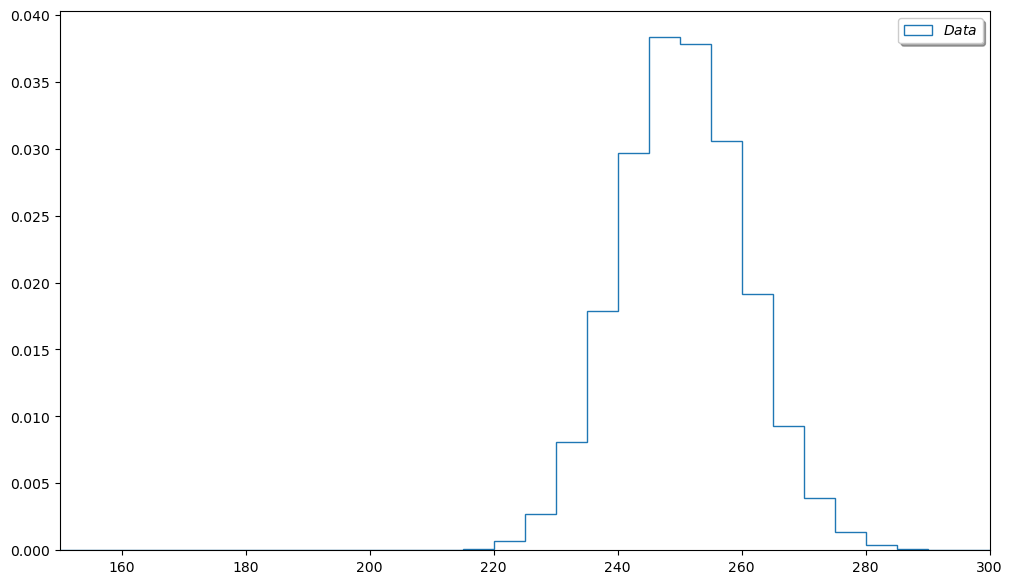

In [15]:
plt.hist(data, dataedges, density=True, fill=False, histtype='step', label = '$Data$')
plt.xlim([150,300])
plt.legend(loc=0, shadow=True);

This histogram shows that the observed signal appears to be quite a lot brighter than that of a Poisson distribution with a mean of 100. This is because the signal is injected a number of times and thus "pushes" the distribution to the right and towards higher observed signal values.

The signal, since the Poisson distribution has a high mean to begin with, appears on the histogram very similar to a Gaussian distribution (due to the central limit theorem).

This histogram shows the distribution of observed data a true signal (in this case of strength 15) produces and thus the probability density of observing certain values of data given the true signal.

## b)

The signal is biased and seems to be favoring a value stronger than the injected signal (this is also a well-known characteristic of Poisson distributions) - thus, not equally likely to be stronger or weaker than the true injected signal. It is not symmetric.

We can also tell the distribution is not symmetric from the plot that the right and left of the mean value are not the same.

## Problem 3

Now, we inject a range of signals ranging from 0 to 35$\sigma$. This can be plotted in the 2D histogram below.

<ipython-input-16-c947ded31db5>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters,signalcenters,Psd.T)


Text(0.5, 0, 'Observed data, $P(d|s)$')

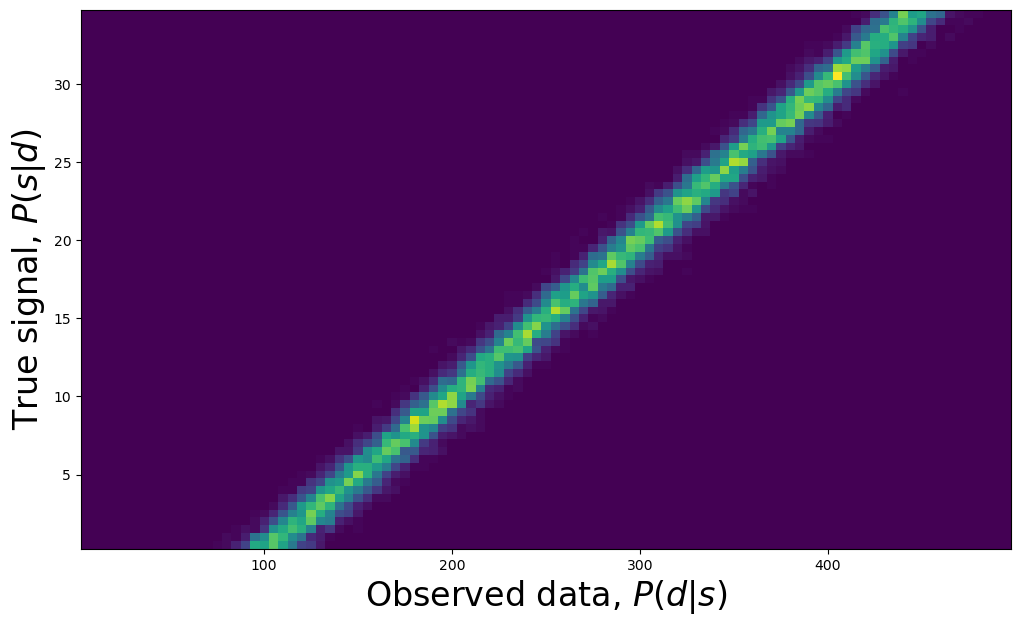

In [16]:
signal = stats.uniform.rvs(loc=0, scale=35, size = N_qcd)

for i in range(10): # We add the signal to the background ten times
    if i == 0:
        data = bkgd + signal
    else:
        data = data + signal # This is where we add the signal a significant amount of times as to make it moderately strong

signaledges = np.linspace(0, 35, (35-0)*2+1)
dataedges = np.linspace(0, 500, 100+1)

Psd, temp, temp2= np.histogram2d(data, signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

Here, we are simulating the injection of a range of signals from 0 to 35$\sigma$ and when we do this for a range of signals and not just one signal (as we did in part b) we can easily visualize what slicing the data for different values of true signal vs. the actual observed signal means.

## b)

We show that this still yields the same distribution as previously for the same injected signal-value.

<ipython-input-17-39a49061a191>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters,signalcenters,Psd.T)


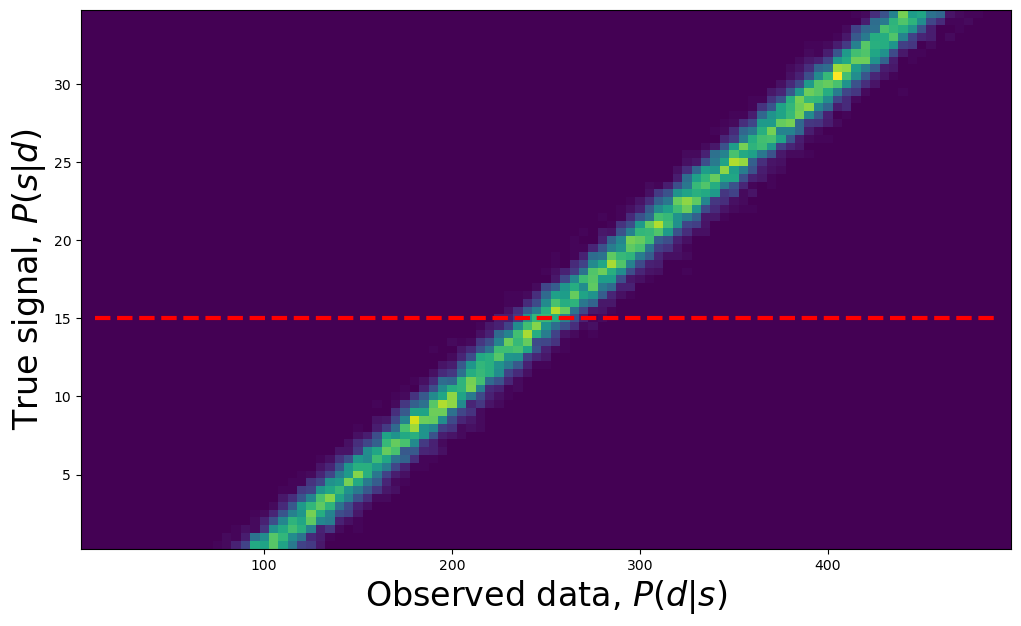

In [17]:
slice_loc1 = 15

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.hlines(slice_loc1, xmin=10, xmax=490, color='r', linestyle = '--', linewidth = 3)

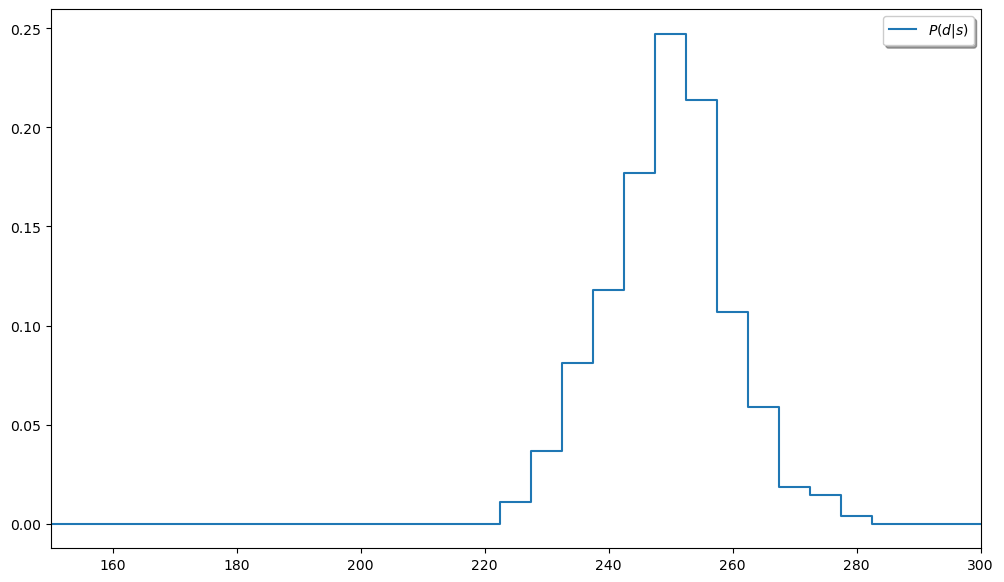

In [18]:
idx = np.argwhere(temp2 == slice_loc1)[0]
norm_factor = 1/sum(Psd.T[slice_loc1])

plt.step(datacenters, Psd[:, idx]*norm_factor, label = '$P(d|s)$')
plt.xlim([150,300])
plt.legend(loc=0, shadow=True);

We can see that this is the same distribution as we got in Problem 2 - thus, the methods are consistent.

Note: although the distributions are not 

## c)

Now, we will reverse the problem by selecting an observed data value (pick something quite a bit stronger than 5𝜎) and creating a 1D histogram of the true signal probability given the observed data.

We pick the observed data value of 200 - which seems to be quite a lot stronger than $5\sigma$.

<ipython-input-19-9f6c4a06c0de>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters,signalcenters,Psd.T)


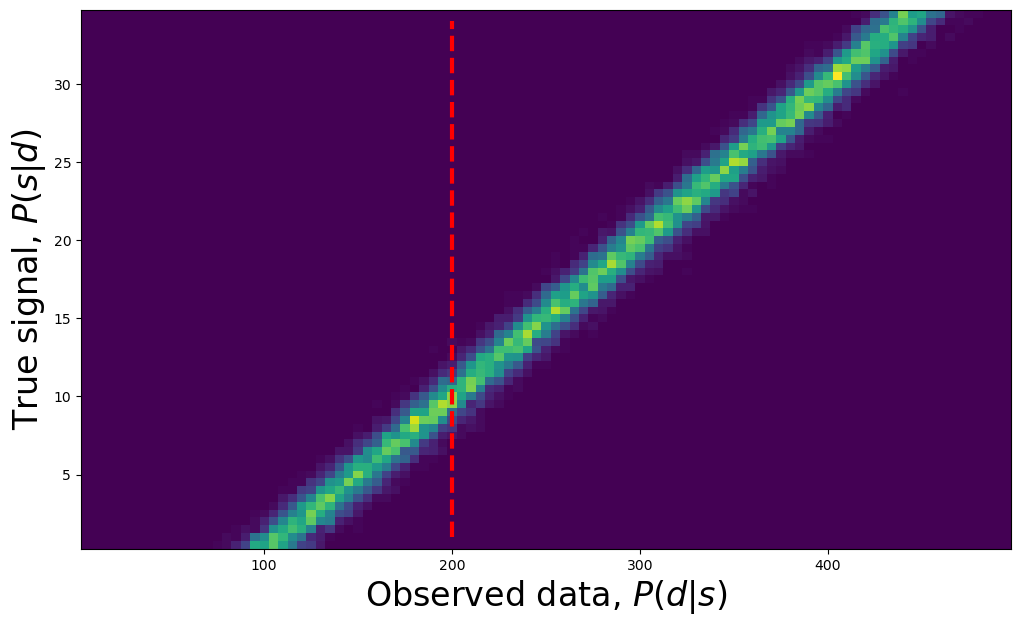

In [19]:
slice_loc2 = 200

Psd, temp, temp2= np.histogram2d(data, signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.vlines(slice_loc2, ymin=1, ymax=34, color='r', linestyle = '--', linewidth = 3)

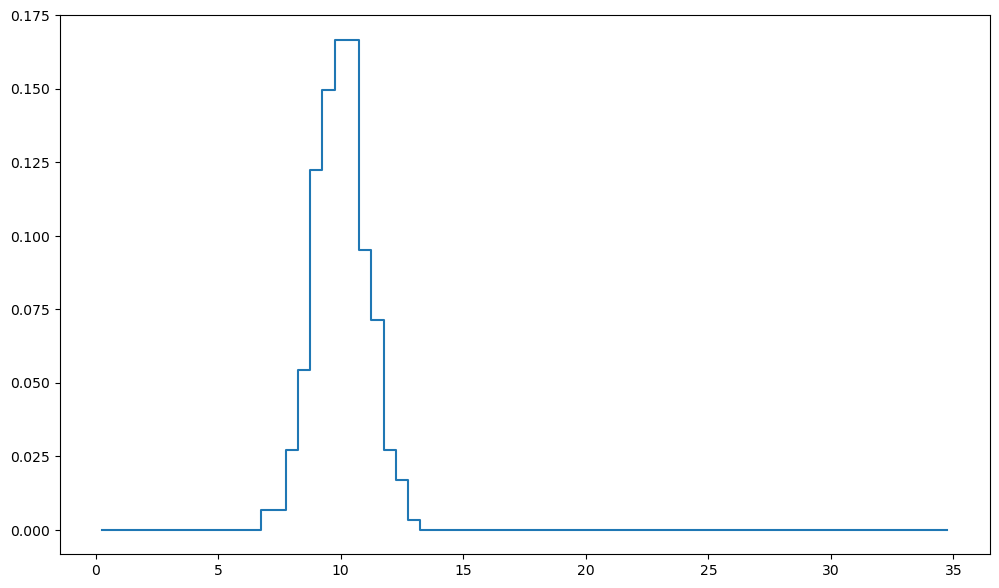

In [20]:
idx = np.argwhere (temp == slice_loc2)[0]
norm_factor = 1/sum(Psd.T[idx][0]) # May have to change this from slice_loc to idx

plt.step(signalcenters, Psd[idx, :][0]*norm_factor, label = '$P(s|d)$')

This is the distribution of true signals that could produce the observed signal of 200.

## d)

Now, what is the $1\sigma$ uncertainty on the true signal strength (represented by the above histogram)?

For this problem, we will find the most probable value of the true signal at our observed data slice. Then, we will integrate (sum) on each side of this value until we get a probability of $\pm 34 \% $.

In [21]:
Psd_array = Psd[idx, :][0]*norm_factor
m = np.max(Psd_array)
idxmax = np.argwhere(Psd_array == m)[0][0]
idxmax

20

In [22]:
for i in range(idxmax, Psd_array.size):
    s = np.sum(Psd_array[idxmax:i])
    if s >= 0.34: # 1 sigma
        print(i, s)
        i1 = i
        break

23 0.42857142857142855


In [23]:
np.arange(0, idxmax)[::-1]

array([19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,
        2,  1,  0])

In [24]:
for i in np.arange(0, idxmax)[::-1]:
    s = np.sum(Psd_array[i:idxmax])
    if s >= 0.34: # 1 sigma
        print(i, s)
        i2 = i
        break

16 0.35374149659863946


In [25]:
lower = temp2[idxmax]-temp2[i2]
upper = temp2[i1]-temp2[idxmax]
upper, lower, temp2[idxmax]

(1.5, 2.0, 10.0)

Thus, we have a 1 sigma uncertainty of $+1.5$ and $-1.0$ such that we report our value as $11.5_{-1.0}^{+1.5}$. This is our confidence interval.

## e)

This uncertainty is **not symmetric**, which we can tell from the two **different** values we get when integrating for the $1\sigma$ uncertainty.